<a href="https://colab.research.google.com/github/chaitanyamhaiskar/Data-Analysis/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import yfinance as yf
import pandas as pd
import calendar

In [45]:
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start='2022-04-01', end='2024-04-01',progress=False)

monthly_data = stock_data['Close'].resample('M').mean()

monthly_data = monthly_data.reset_index()

monthly_data.columns = ['Date', 'Close']

monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

monthly_data['YearMonth'] = monthly_data['Date'].dt.to_period('D')

monthly_data = monthly_data.drop(columns=['Date'])

print(monthly_data)


          Close   YearMonth
0   2466.796811  2022-04-30
1   2368.913842  2022-05-31
2   2422.700029  2022-06-30
3   2243.647380  2022-07-31
4   2409.762915  2022-08-31
5   2312.189686  2022-09-30
6   2249.398784  2022-10-31
7   2403.073626  2022-11-30
8   2404.573575  2022-12-31
9   2281.789249  2023-01-31
10  2184.301807  2023-02-28
11  2112.341890  2023-03-31
12  2172.342142  2023-04-30
13  2275.137551  2023-05-31
14  2322.302351  2023-06-30
15  2513.970633  2023-07-31
16  2503.290905  2023-08-31
17  2405.040002  2023-09-30
18  2307.859985  2023-10-31
19  2351.357471  2023-11-30
20  2499.625024  2023-12-31
21  2695.995222  2024-01-31
22  2924.923805  2024-02-29
23  2926.699992  2024-03-31


In [31]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Close      264 non-null    float64  
 1   YearMonth  264 non-null    period[D]
dtypes: float64(1), period[D](1)
memory usage: 4.2 KB


In [48]:
monthly_data.to_csv('monthlyStockDataTest.csv', index=False)

In [63]:
df = pd.read_csv('monthlyStockData.csv')
# cf = pd.read_csv('monthlyStockDataTest.csv')

In [64]:
df

,Close,YearMonth
0,47.100885,2000-04-30
1,46.338206,2000-05-31
2,48.099143,2000-06-30
3,50.304230,2000-07-31
4,47.744285,2000-08-31
...,...,...
259,2290.363708,2021-11-30
260,2204.546610,2021-12-31
261,2262.994434,2022-01-31
262,2185.660913,2022-02-28


In [67]:
df.set_index(df['YearMonth'], inplace=True)

In [70]:
df

,Close,YearMonth
YearMonth,,
2000-04-30,47.100885,2000-04-30
2000-05-31,46.338206,2000-05-31
2000-06-30,48.099143,2000-06-30
2000-07-31,50.304230,2000-07-31
2000-08-31,47.744285,2000-08-31
...,...,...
2021-11-30,2290.363708,2021-11-30
2021-12-31,2204.546610,2021-12-31
2022-01-31,2262.994434,2022-01-31


In [71]:
df.drop('YearMonth', axis=1, inplace=True)

In [72]:
df

,Close
YearMonth,
2000-04-30,47.100885
2000-05-31,46.338206
2000-06-30,48.099143
2000-07-31,50.304230
2000-08-31,47.744285
...,...
2021-11-30,2290.363708
2021-12-31,2204.546610
2022-01-31,2262.994434


<Axes: xlabel='YearMonth'>

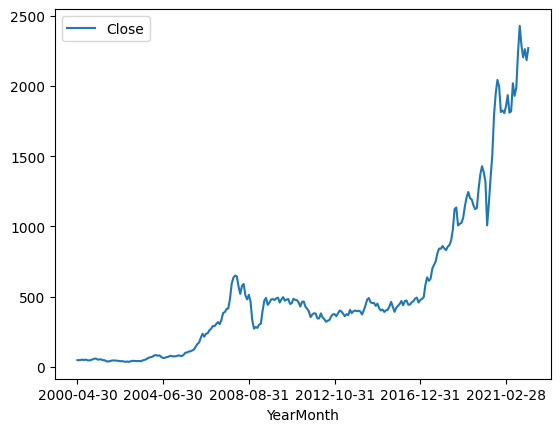

In [73]:
df.plot()

In [74]:
df_moving_avg = df.rolling(window=12).mean()
df_moving_std = df.rolling(window=12).std()

In [75]:
df_moving_avg.head(20)

,Close
YearMonth,
2000-04-30,NaN
2000-05-31,NaN
2000-06-30,NaN
2000-07-31,NaN
2000-08-31,NaN
2000-09-30,NaN
2000-10-31,NaN
2000-11-30,NaN
2000-12-31,NaN


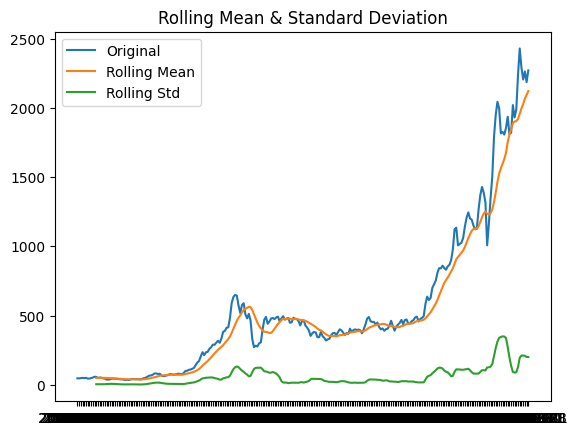

In [77]:
import matplotlib.pyplot as plt
orig = plt.plot(df, label='Original')
mean = plt.plot(df_moving_avg, label='Rolling Mean')
std = plt.plot(df_moving_std, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [80]:
test_result=adfuller_test(df['Close'])

ADF Test Statistic : 2.96655472620713
p-value : 1.0
#Lags Used : 13
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [82]:
adfuller_test(df['Close'])

ADF Test Statistic : 2.96655472620713
p-value : 1.0
#Lags Used : 13
Number of Observations Used : 250
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


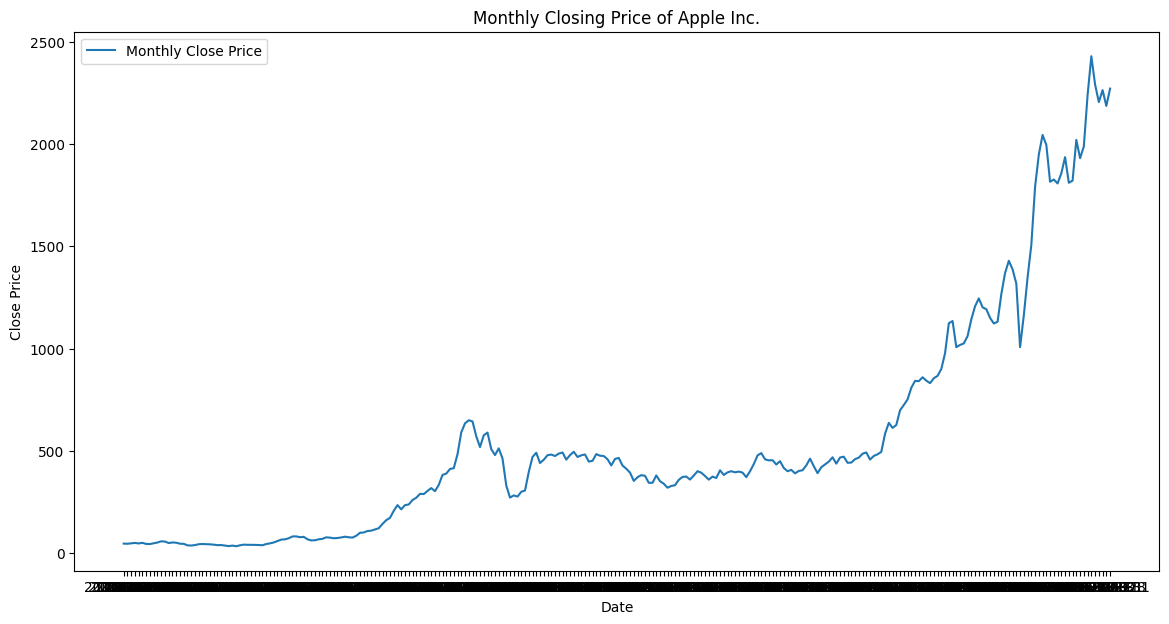

In [86]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Monthly Close Price')
plt.title('Monthly Closing Price of Apple Inc.')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [89]:
import plotly.express as px
fig = px.line(df, x=df.index, y='Close')
fig.show()

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [2]:
df = pd.read_csv('/content/monthlyStockData.csv')
df

,Close,YearMonth
0,47.100885,2000-04-30
1,46.338206,2000-05-31
2,48.099143,2000-06-30
3,50.304230,2000-07-31
4,47.744285,2000-08-31
...,...,...
259,2290.363708,2021-11-30
260,2204.546610,2021-12-31
261,2262.994434,2022-01-31
262,2185.660913,2022-02-28


In [5]:
df = df.set_index(df['YearMonth'])
df.head()

,Close,YearMonth
YearMonth,,
2000-04-30,47.100885,2000-04-30
2000-05-31,46.338206,2000-05-31
2000-06-30,48.099143,2000-06-30
2000-07-31,50.304230,2000-07-31
2000-08-31,47.744285,2000-08-31


In [6]:
df = df.drop(columns=['YearMonth'])

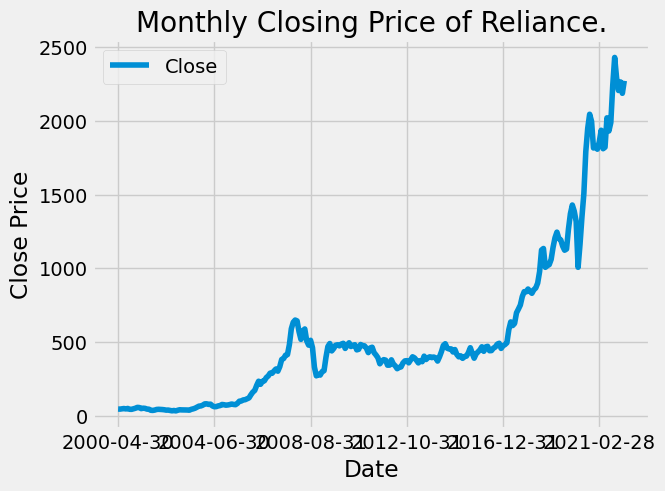

In [12]:
df.plot()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Monthly Closing Price of Reliance.')
plt.style.use('fivethirtyeight')
plt.show()

In [13]:
import plotly.express as px
fig = px.line(df, x=df.index, y='Close')
fig.show()

In [15]:
px.histogram(df,x=df['Close'])

# checking stationaryness

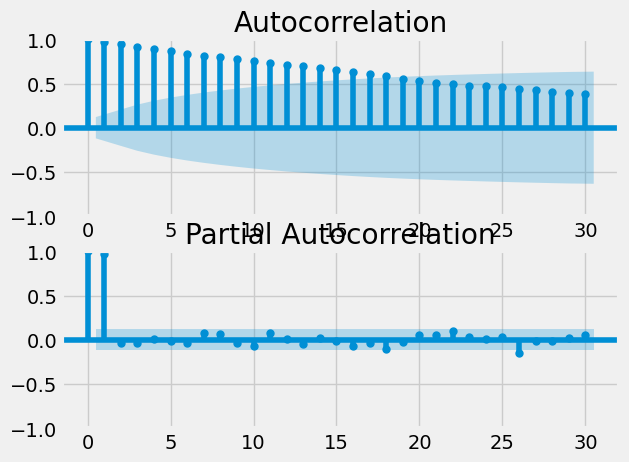

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
plt.figure()
plt.subplot(211)
tsa_plots.plot_acf(df['Close'],ax = plt.gca(),lags=30)
plt.subplot(212)
tsa_plots.plot_pacf(df['Close'],ax = plt.gca(),lags=30)
plt.show()

In [26]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #determine rolling statistics
  rolmean = timeseries.rolling(window=24).mean()
  rolstd = timeseries.rolling(window=24).std()
  #plot rolling statistics
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

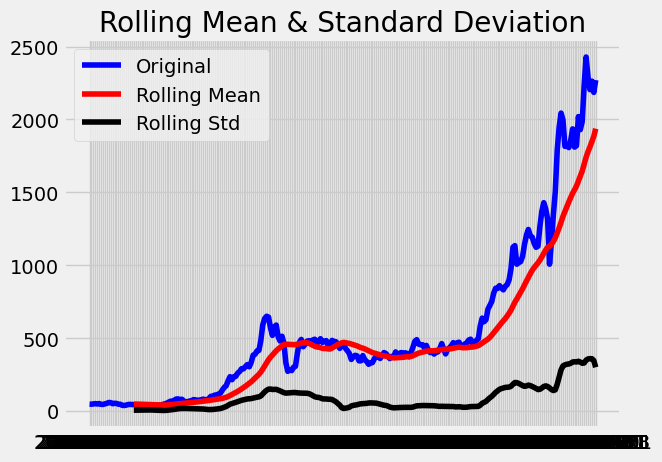

Results of Dickey-Fuller Test:
Test Statistic                   2.966555
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


In [27]:
test_stationarity(df['Close'])

In [39]:
#To make it stationary we will use differencing
df.drop(0,axis = 1, inplace = True)

In [40]:
df.columns

Index(['Close'], dtype='object')

In [41]:
df_diff = df.diff(periods=1)
df_diff.dropna(inplace=True)

<Axes: xlabel='YearMonth'>

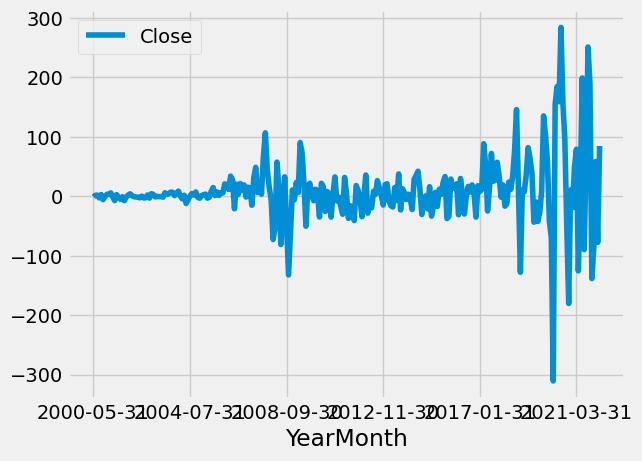

In [42]:
df_diff.plot()

<Axes: xlabel='YearMonth'>

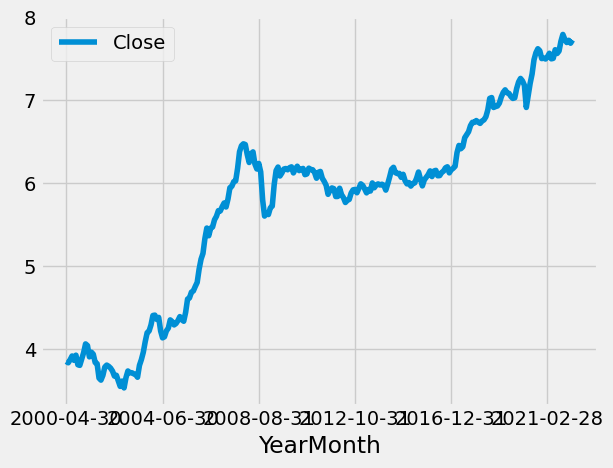

In [43]:
#log transform
df_log = np.log(df)
df_log.plot()

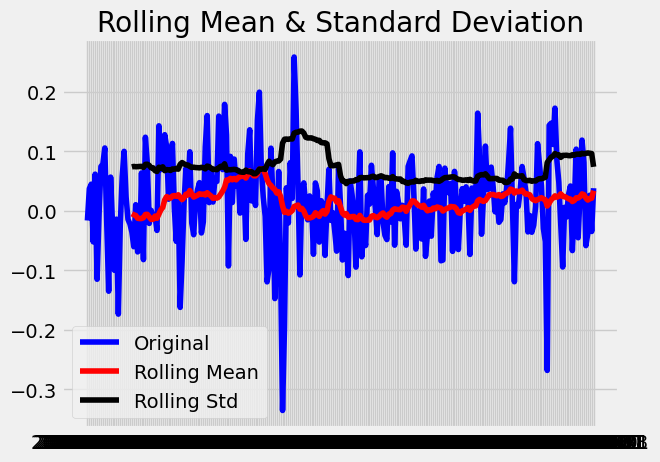

Results of Dickey-Fuller Test:
Test Statistic                -1.057588e+01
p-value                        7.107819e-19
#Lags Used                     1.000000e+00
Number of Observations Used    2.610000e+02
Critical Value (1%)           -3.455656e+00
Critical Value (5%)           -2.872678e+00
Critical Value (10%)          -2.572705e+00
dtype: float64


In [45]:
df_log_diff = np.log(df).diff(periods=1)
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

In [50]:
import warnings
warnings.filterwarnings('ignore')

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  264
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1409.379
Date:                Sun, 16 Jun 2024   AIC                           2828.758
Time:                        10:34:14   BIC                           2846.619
Sample:                    04-30-2000   HQIC                          2835.936
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4442      0.392      1.133      0.257      -0.325       1.213
ar.L2          0.1148      0.150      0.766      0.444      -0.179       0.409
ma.L1         -0.0684      0.401     -0.171      0.865      -0.854       0.717
ma.L2         -0.4169      0.275     -1.517      0.129      -0.955       0.122
sigma2      2640.9649    100.311     26.328      0.000    2444.358    2837.571
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               995.84
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              55.28   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

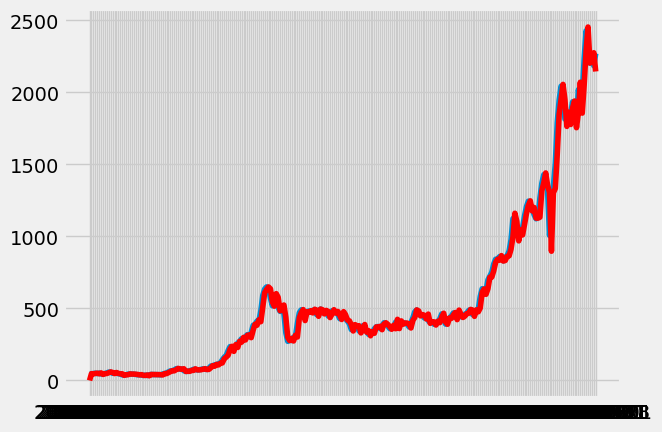

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df,order=(2,1,2),seasonal_order=(0,0,0,0))
results = model.fit()
plt.plot(df)
plt.plot(results.fittedvalues, color='red')
results.summary()

In [52]:
df

,Close
YearMonth,
2000-04-30,47.100885
2000-05-31,46.338206
2000-06-30,48.099143
2000-07-31,50.304230
2000-08-31,47.744285
...,...
2021-11-30,2290.363708
2021-12-31,2204.546610
2022-01-31,2262.994434


In [53]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00


In [54]:
from pmdarima import auto_arima


In [56]:
model = auto_arima(
    df,
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    start_P=0, max_P=5,
    start_Q=0, max_Q=5,
    seasonal=True,
    m=12,  # Seasonal period (e.g., 12 for monthly data with yearly seasonality)
    d=None,  # Let auto_arima find the optimal order of differencing
    D=1,  # Assuming one level of seasonal differencing
    trace=True,  # Print the progress
    error_action='ignore',  # Ignore and continue on errors
    suppress_warnings=True,  # Suppress warnings
    stepwise=True,  # Apply stepwise algorithm to find the best model
    n_jobs=-1  # Use all available CPU cores
)

# Print the summary of the model
print(model.summary())

# Make predictions
forecast = model.predict(n_periods=12)
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_series, label='Forecast', color='orange')
plt.title('Monthly Closing Price of Apple Inc. with ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2909.442, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2781.758, Time=0.69 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2888.874, Time=0.37 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2769.217, Time=2.89 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2760.717, Time=4.42 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2750.835, Time=6.48 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=2749.341, Time=14.36 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=2746.543, Time=23.15 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=14.74 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=2746.612, Time=17.53 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=2762.328, Time=12.77 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=2741.574, Time=17.82 sec
 ARIMA(2,1,0)(4,1,1)[12]     

KeyboardInterrupt: 